<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP8/TP8_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 8: Juego del caos

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita renderizar el triangulo de Sierpinski mediante el juego del caos.
## Objetivos Específicos
*   Implementar sistemas de funciones iteradas para renderizar fractales
*   Visualizar los resultados

###Problema
Implementar sistemas de funciones iteradas que permita renderizar estructuras fractales. Permitir al usuario interactuar con el aplicativo.

In [6]:
#Lectura de librerías
import matplotlib.pyplot as plt
import numpy as np

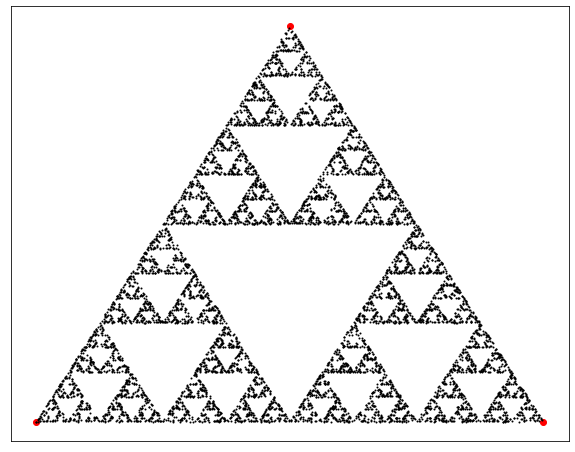

In [28]:
#@title Selección de valores{ run: "auto" }
interactions  = 8000 #@param {type:"slider", min:0, max:8000, step:100}

vx = [[0,0], [2, 0], [1, vy]]
vy = (2**2 - (1)**2)**(1/2)


aleatorio = np.random.randint(0, 3, interactions)

fig = plt.figure(figsize = (10, 8))
puntos, = plt.plot([], [], 'o', ms=1)


#Dibuja los vértices del triángulo
plt.plot([0, 2, 1], [0, 0, vy], 'o', color='red')

#Semilla
x = [-0, -0]
xdata, ydata = [], []
plt.plot(x[0], x[1], 'o', color='black', ms=1)

for i in range(interactions):
    plt.plot(x[0], x[1], 'o', color='black', ms=1)
    x[0] = (vx[aleatorio[i]][0] + x[0]) / 2
    x[1] = (vx[aleatorio[i]][1] + x[1]) / 2

plt.xticks([])
plt.yticks([])
plt.show()

###Análisis de resultados

*   El aplicativo desarrollado satisface con los objetivos del trabajo práctico, el mismo permite el renderizado del triángulo de Sierpinski  aplicando el sistema de funciones iteradas (IFS).
*   El usuario puede interactuar con el aplicativo mediante scrollbars, donde se permite seleccionar el número de interacciones en el renderizado.